In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

### a) Read tweet counts.csv file and define two variables which represent the week number and weekly tweet counts. What is the average number of weekly tweets over the last year? This is the horizontal line, I have plotted in the figure above.

In [2]:
df = pd.read_csv("tweet_counts.csv",header=None)
data = [df]
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
print (df.head())


0 week count
1    1  39.0
2    2  46.0
3    3  41.0
4    4  42.0
5    5  31.0


In [3]:
week=df['week']
tweetcount=df['count']
tweetcount = pd.Series(tweetcount)
tweetcount = pd.to_numeric(tweetcount, errors='ignore')
k = tweetcount
avgcount = np.mean(k)

### b) Use matplotlib.pyplot.bar to create the same figure shown above.

Text(0.5, 1.0, 'Weekly count of tweets')

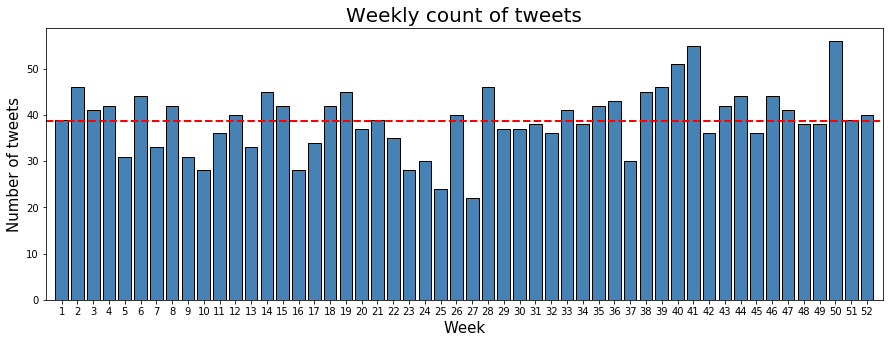

In [4]:


plt.figure(figsize=(15,5))
plt.bar(week,tweetcount, color='steelblue',edgecolor='black')
plt.xlim(-1,52)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)
plt.axhline(avgcount, color='r', linestyle='dashed', linewidth=2)
plt.title('Weekly count of tweets', fontsize=20)

### c) Prove explicitly that the expected value of lambda = 1/alpha

∞
∫λαe^(-αλ)dλ
0

 ∞
α∫λe^(-αλ)dλ
 0
 
= ∫fg'=fg-∫f'g

f = λ, g' = e^(-αλ), f' = 1, g = (e^(-αλ))/α

=  -λe^(-αλ)/α - ∫-(e^(-αλ)/α)*dλ

=  ∫-(e^(-αλ)/α) dλ = 1/α^2∫e^u*du

∫e^u*du= e^u

1/α^2∫e^u*du = e^u/a^2

-λe^(-αλ)/α - ∫-(e^(-αλ)/α)*dλ = -λe^(-αλ)/α -(e^(-αλ)/α^2)

α∫λe^(-αλ)dλ = -λe^(-αλ) - (e^(-αλ))/α + C

= 1/a


### d) Take the average value of λ from part "a" to estimate α. Plot the estimated distribution function (P(λ) vs λ).

In [5]:
Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)


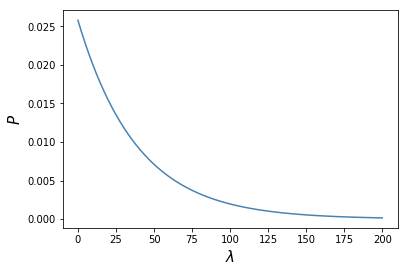

In [6]:
avg_lambda = 1/np.mean(k)

plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),avg_lambda),c='steelblue')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P$', fontsize=15)
plt.show()

### e) Use numpy.linspace to create two variables with 1x50 array in the interval of 25 and 50.

In [7]:
λ1 = np.linspace(25,50,50)
λ2 = np.linspace(25,50,50)
week = week

Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

In [8]:
λ1_mesh, λ2_mesh, week_mesh=np.meshgrid(λ1,λ2,week)

In [9]:
λ1_mesh[0][0][0]

25.0

P(Bob changed tweet habit|tweet data) ∝  P(tweet data|Bob changed tweet habit) P(Bob changed tweet habit)

<div align="center">$P(\text{Bob changed tweet habit|tweet data})= \frac{P(\text{tweet data|Bob changed tweet habit})P(\text{Bob changed tweet habit})}{P(\text{tweet data|Bob changed tweet habit})P(\text{Bob changed tweet habit})+P(\text{tweet data|bob did not change tweet habit})P(\text{bob did not change tweet habit})}$</div>

### f) Write a code to find marginalized-posterior for λ1, λ2 and WS.

In [116]:
Pweek = 1/52

alpha=1/np.mean(k)
def Posterior(lambda1,lambda2,week_set):
    P=1
    for i in k[week<week_set]:
        P=P*Poisson(i, lambda1)*alpha*np.exp(-alpha*lambda1)
    for j in k[week>=week_set]:
        P=P*Poisson(j, lambda2)*alpha*np.exp(-alpha*lambda2)
    return(P)

In [40]:
λ1_mesh,λ2_mesh, week_mesh=np.meshgrid(λ1,λ2,week,sparse=False)

In [41]:
week_mesh.shape

(50, 50, 52)

In [86]:
Posterior_V = np.vectorize(Posterior)

D = Posterior_V(λ1_mesh,λ2_mesh, week_mesh)

In [87]:
D.shape

(50, 50, 52)

In [88]:
D

array([[[6.50810650e-247, 6.50810650e-247, 6.50810650e-247, ...,
         6.50810650e-247, 6.50810650e-247, 6.50810650e-247],
        [6.50810650e-247, 8.47375460e-246, 6.26653159e-245, ...,
         5.92763086e-242, 1.08874649e-241, 1.41845536e-241],
        [6.50810650e-247, 9.35644923e-245, 4.38826443e-243, ...,
         2.70110827e-237, 8.91052074e-237, 1.48903376e-236],
        ...,
        [6.50810650e-247, 4.33855670e-244, 1.91925031e-249, ...,
         4.66047403e-222, 2.19691825e-216, 1.12181204e-215],
        [6.50810650e-247, 9.80203389e-245, 7.32924821e-251, ...,
         1.70043971e-224, 8.48552988e-219, 3.84601146e-218],
        [6.50810650e-247, 2.11967503e-245, 2.57184054e-252, ...,
         5.16166448e-227, 2.71054408e-221, 1.08595856e-220]],

       [[4.81271972e-241, 3.69631810e-242, 4.99825016e-243, ...,
         5.28401536e-246, 2.87685819e-246, 2.20815497e-246],
        [4.81271972e-241, 4.81271972e-241, 4.81271972e-241, ...,
         4.81271972e-241, 4.81271972e-

In [80]:
for i in range(0,50):
    for j in range(0,50):
        D

In [89]:
D_T = D.transpose(2,0,1).reshape(-1,D.shape[1])


In [73]:
D_T = np.matrix(D_T)

In [139]:
P_ = D.sum(axis=2)
P__= D.sum(axis=1)
P1,P2 = P_.sum(axis=1),P_.sum(axis=0)
P3 = P__.sum(axis=0)

In [137]:
λ1_mode=np.argmax(P1)
λ2_mode=np.argmax(P2)
week_mode=np.argmax(P3)

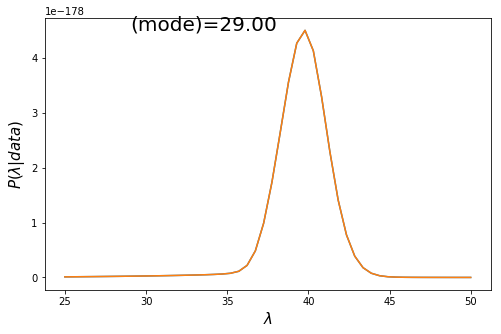

In [132]:
plt.figure(figsize=(8,5))
plt.plot(λ1,P1)
plt.plot(λ2,P2)
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.text(λ1_mode,np.max(P1),'(mode)={:0.2f}'.format(λ1_mode),fontsize=20)
plt.show()

Text(0.5, 1.0, 'Weekly tweet counts')

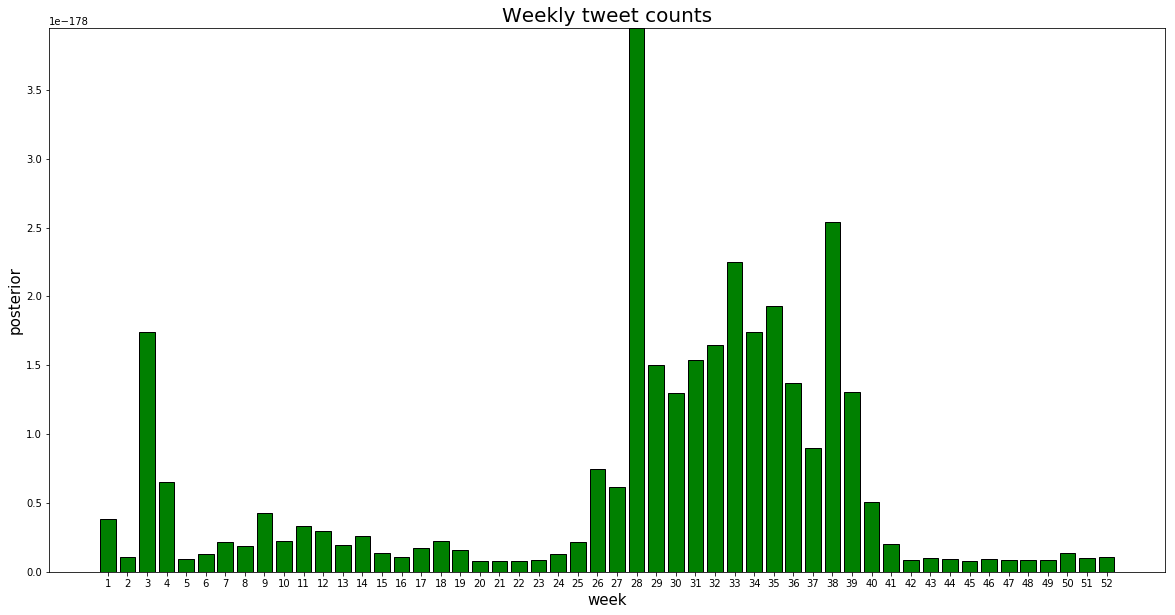

In [135]:
plt.figure(figsize=(20,10))
plt.bar(week,P3, color='green',edgecolor='black')
plt.xlabel('week',fontsize=15)
plt.ylabel('posterior',fontsize=15)

plt.title('Weekly tweet counts', fontsize=20)

### g) How is your belief updated about a sudden change in Bob's tweeting habit?

It's likely for bob to change his tweeting habit around the 28th week.

In [147]:
t = 0

for i in range(0,50):
    if P1[i]-P2[i] > 5:
        print(i)
    else:
        print('no')
    t += 1  

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


In [148]:
P2[0]

1.030606908677383e-180